In [ ]:
from tensorflow import keras as keras
import tensorflow as tf
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

In [ ]:
def load_dataset():
    '''
    Load training dataset
    '''
    Xtrain = []
    Ytrain = []
    with open('../input/training/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [ ]:
# Load dataset
Xdata, Ydata = load_dataset()
Xtrain = Xdata[:]
Ytrain = Ydata[:]

In [ ]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

In [ ]:
# Preview dataset samples
show_image(Xtrain[0], Ytrain[0])

In [54]:
# Configure Model
from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D,Activation, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Convolution2D(24, 5, 5, border_mode="same", init="he_normal", input_shape=(96, 96, 1), dim_ordering="tf"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D());
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(30))
# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 96, 96, 24)        624       
_________________________________________________________________
activation_31 (Activation)   (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 44, 44, 36)        21636     
_________________________________________________________________
activation_32 (Activation)   (None, 44, 44, 36)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 22, 22, 36)        0         
__________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(96, 96, 1..., padding="same", data_format="channels_last", kernel_initializer="he_normal")`
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5))`
/

In [ ]:
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

hist = History()
epochs = 1100
batch_size = 64


## TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(Xtrain, Ytrain, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[hist], verbose=1)


Train on 1712 samples, validate on 428 samples
Epoch 1/1100
1712/1712 [==============================] - 3s 2ms/step - loss: 899.2914 - acc: 0.2646 - val_loss: 345.0829 - val_acc: 0.3995
Epoch 2/1100
1712/1712 [==============================] - 0s 286us/step - loss: 128.5269 - acc: 0.5093 - val_loss: 125.1876 - val_acc: 0.4322
Epoch 3/1100
1712/1712 [==============================] - 0s 285us/step - loss: 85.5650 - acc: 0.7734 - val_loss: 273.6264 - val_acc: 0.4322
Epoch 4/1100
1712/1712 [==============================] - 0s 289us/step - loss: 76.2128 - acc: 0.7734 - val_loss: 128.3131 - val_acc: 0.4322
Epoch 5/1100
1712/1712 [==============================] - 0s 285us/step - loss: 62.7356 - acc: 0.7734 - val_loss: 118.0669 - val_acc: 0.4322
Epoch 6/1100
1712/1712 [==============================] - 0s 289us/step - loss: 54.3944 - acc: 0.7734 - val_loss: 100.5447 - val_acc: 0.4322
Epoch 7/1100
1712/1712 [==============================] - 0s 288us/step - loss: 53.4014 - acc: 0.7734 - val

In [ ]:
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Load test data
def load_testset():
    Xtest = []
    with open('../input/test/test.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)
Xtest = load_testset()

In [34]:
# Preview results on test data
def show_results(image_index):
    Ypred = model.predict(Xtest[image_index:(image_index+1)])
    show_image(Xtest[image_index], Ypred[0])

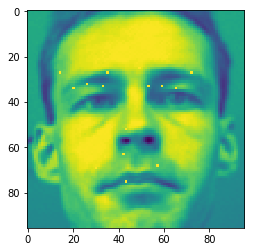

In [35]:
show_results(3)

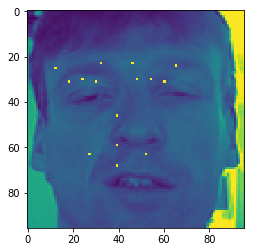

In [36]:
show_results(4)

In [ ]:
show_results(5)

In [ ]:
model.save("points.h5")